# Multiple Linear Regression

### Bike Sharing Assignment

##### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

### Model Building Approach

     1. Reading,Understanding and Visualising Data
     2. Preparing the Data for Modelling(train_test_split,rescalling etc.)
     3. Training the Model
     4. Residual Analysis
     5. Prediction and Evaluation of the Test Set

In [2]:
#Importing the necessary libraries

import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from random import randrange, uniform
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
# Importing the Dataset into DataFrame
bike_rental_data =  pd.read_csv("day.csv", index_col = 0)

In [4]:
#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bike_rental_data.isnull().sum())
missing_value = (missing_value/len(bike_rental_data))*100
missing_value

,0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0
atemp,0.0


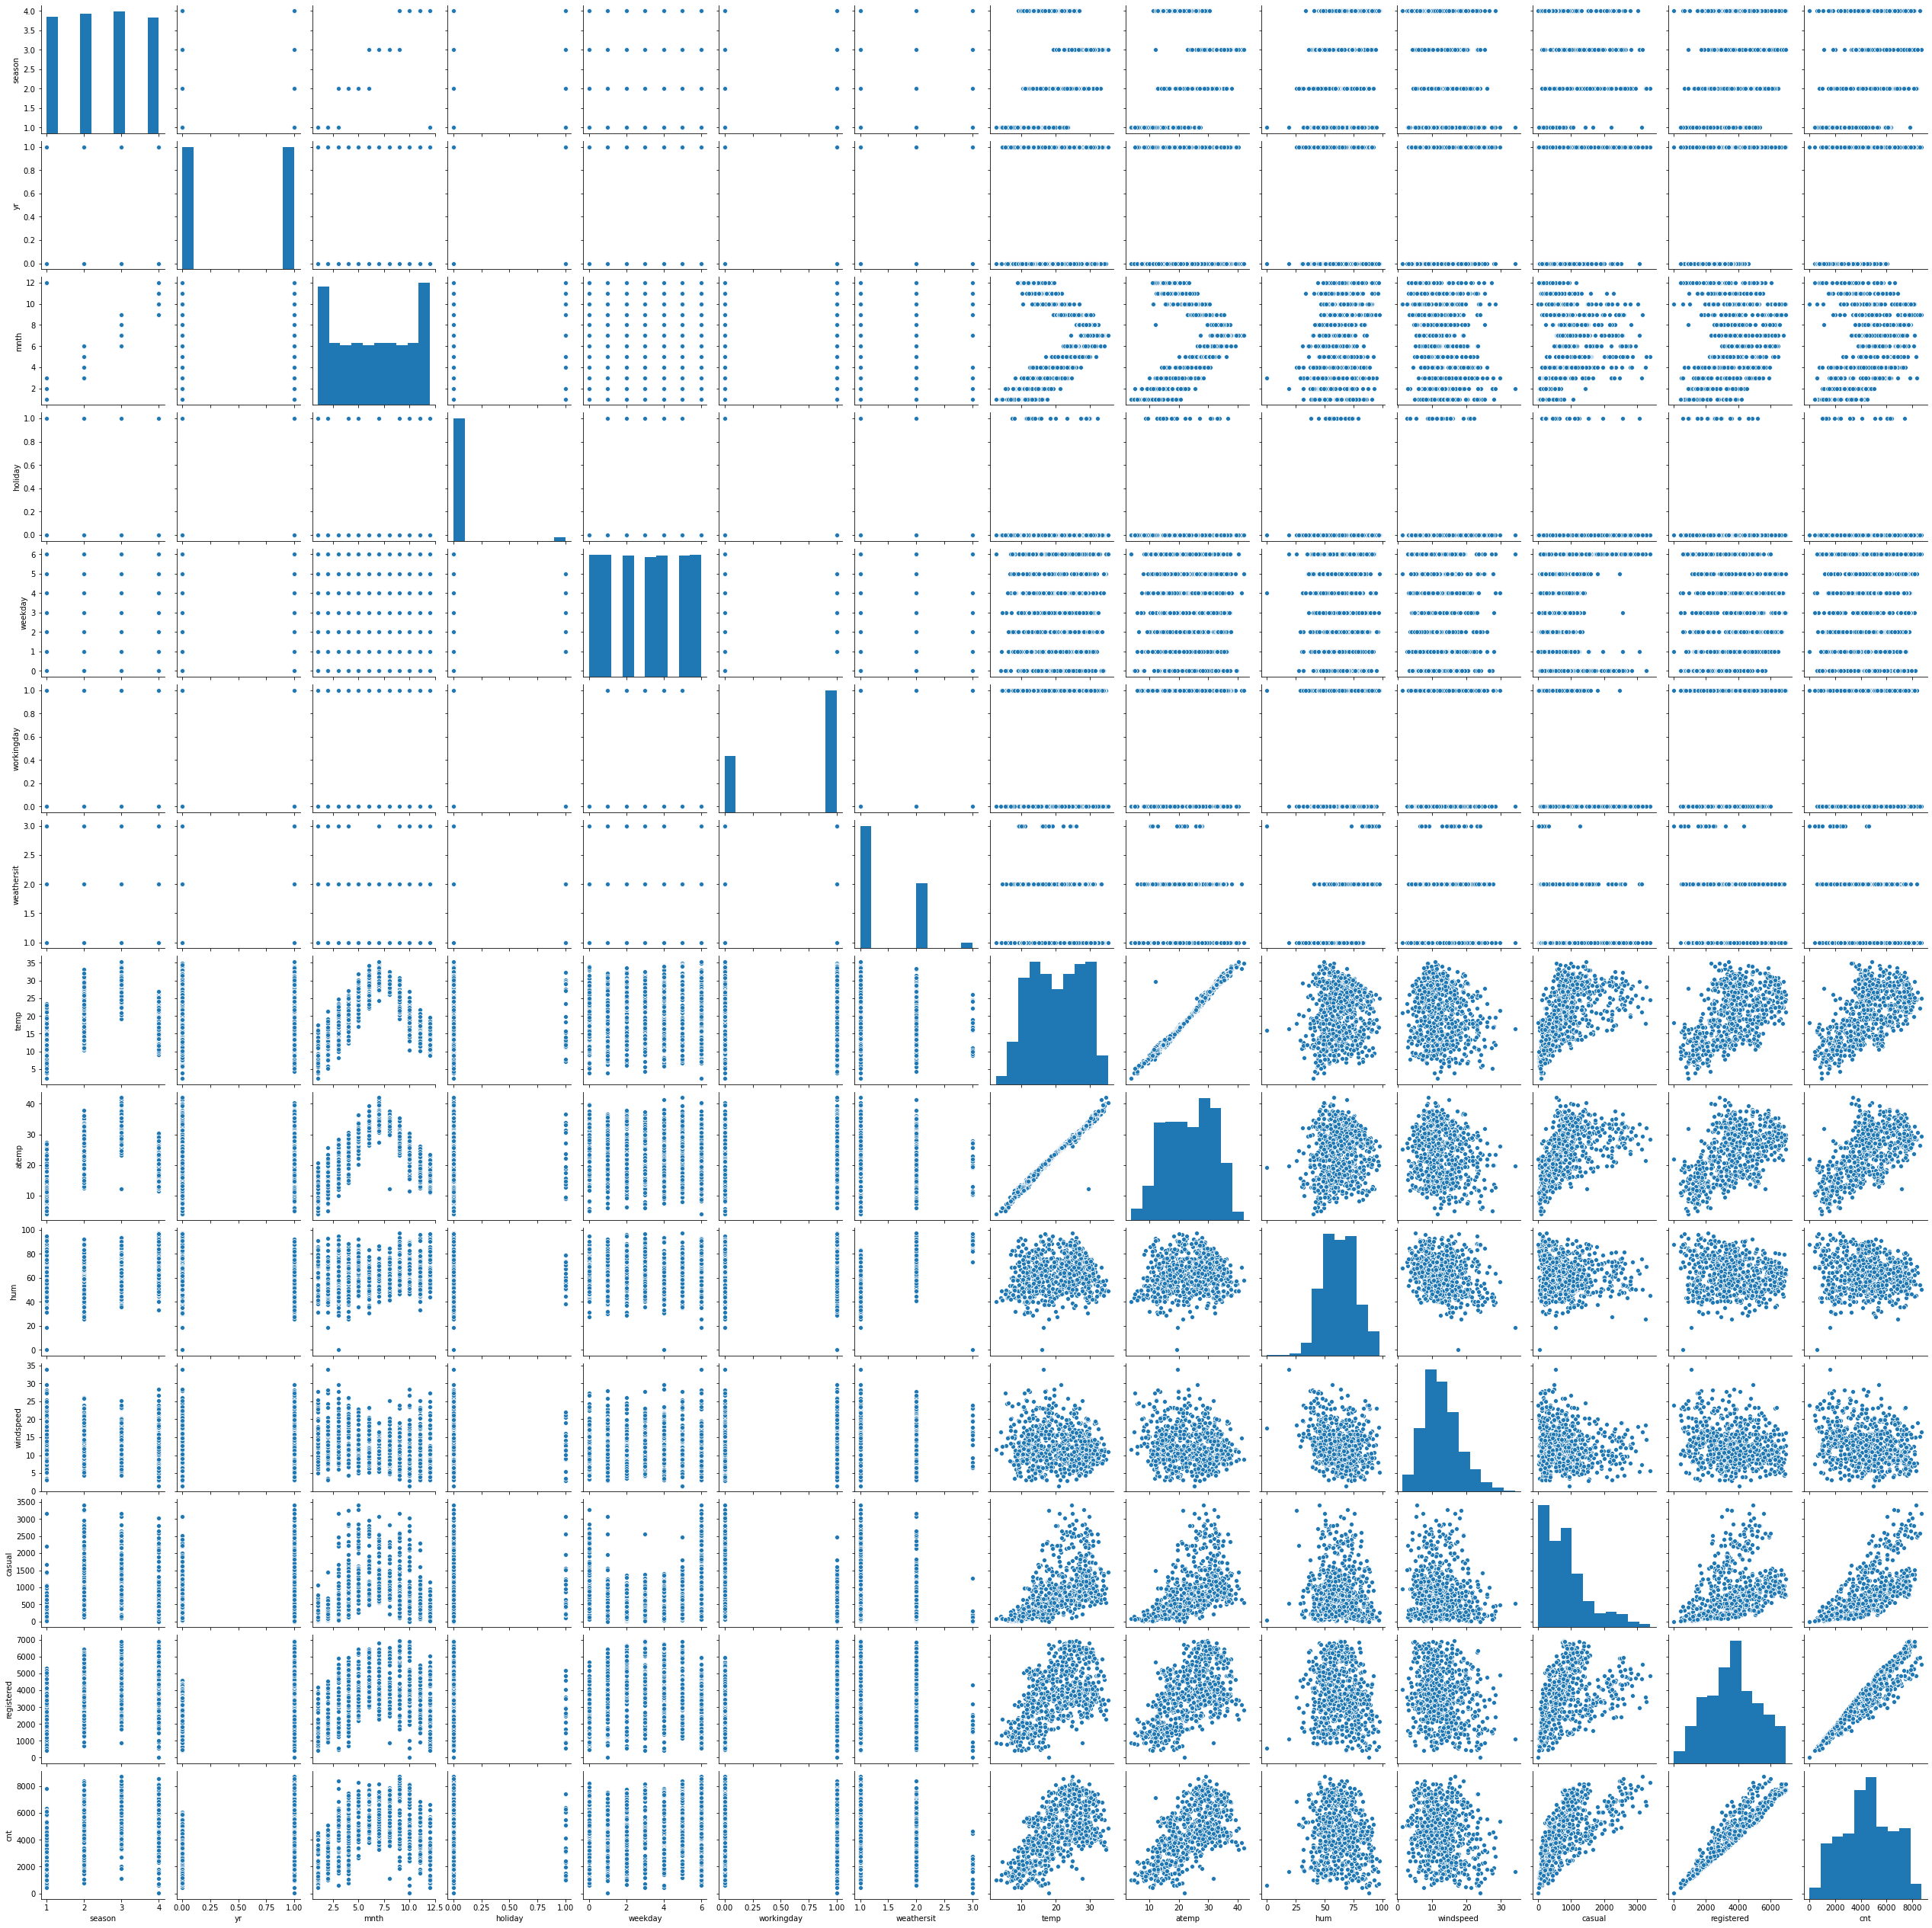

In [926]:
#Data Visualization using Pairplot
sns.pairplot(bike_rental_data)
plt.show()

In [5]:
#Converting "weathersit" clolumn values from numeric to meanigfull lebels and then Creating Dummy variables 
def weathersit(x):
    if x==1:
        return 'clear'
    elif x==2:
        return 'mist'
    elif x==3:
        return 'light_snow'
    else:
        return 'heavy_snow'
bike_rental_data['weathersit'] = bike_rental_data['weathersit'].apply(lambda x:weathersit(x))
df_weathersit=pd.get_dummies(bike_rental_data['weathersit'],drop_first=True)
bike_rental_data=pd.concat([bike_rental_data,df_weathersit],axis=1)

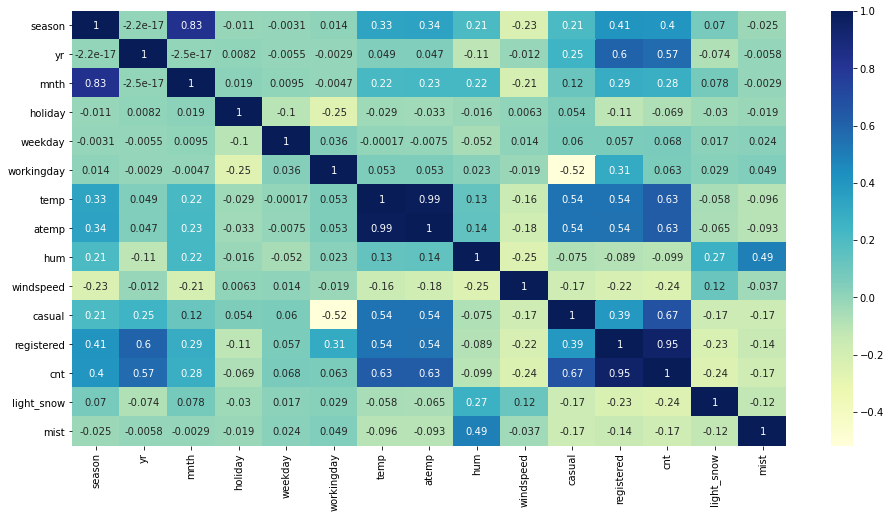

In [6]:
# Heatmap to find CoRelation among dependent and target variable(cnt)
plt.figure(figsize=(16,8))
sns.heatmap(bike_rental_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [7]:
#Creating Training and Test DataSets

bike_rental_data_train,bike_rental_data_test=train_test_split(bike_rental_data,train_size=0.7,random_state=100)
print(bike_rental_data_train.shape)
print(bike_rental_data_test.shape)

(510, 17)
(220, 17)


In [8]:
#Creating target variable (cnt) and dependent variable training sets

y_train = bike_rental_data_train.pop('cnt')
X_train = bike_rental_data_train

In [9]:
# Scalling the training set with min max scaller
scaler = MinMaxScaler()
scale_var=['mnth','holiday','weekday','temp','hum','windspeed']
X_train[scale_var] = scaler.fit_transform(X_train[scale_var])
X_train.describe()

<ipython-input-9-6d5cb9c73f51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_var] = scaler.fit_transform(X_train[scale_var])
C:\Users\sarmaha\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,light_snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.513725,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,23.500287,0.650480,0.320883,837.633333,3647.703922,0.029412,0.345098
std,1.110235,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,8.090963,0.145846,0.169803,675.936359,1578.410906,0.169124,0.475867
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000
25%,2.000000,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,16.603063,0.538643,0.199179,311.000000,2468.250000,0.000000,0.000000
50%,3.000000,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,24.131150,0.653714,0.296763,700.000000,3657.000000,0.000000,0.000000
75%,3.000000,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,30.177700,0.754830,0.414447,1076.250000,4841.000000,0.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000


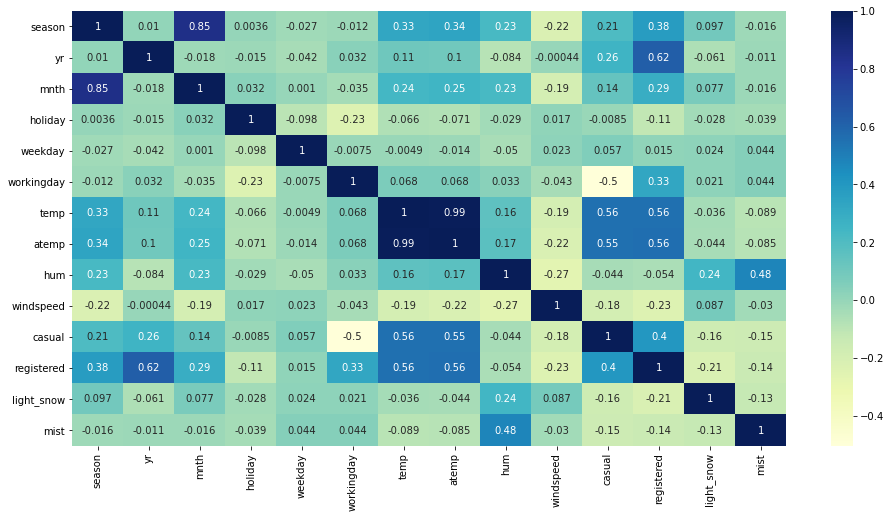

In [10]:
# Heatmap to find CoRelation among the dependent variables

plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [11]:
#Dropping Date and Highly CoRelated Dependent Variables from X_train
X_train = X_train.drop(['atemp','casual','registered','season','dteday','weathersit'],axis=1)

### Training the Model with Gradually Increasing Dependent Variables

In [12]:
#Training with considering only "temp" as dependent variable as it has the highest CoRelation with "cnt"
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    1491.214309
temp     5571.088025
dtype: float64

In [13]:
# Checking the statistical values with one dependent variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           2.46e-61
Time:                        10:57:36   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Considering few more dependent variables to train the model and check r-squared and p-values
X_train_sm = X_train[['temp','mnth','mist','light_snow','yr','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         1273.336453
temp          4386.190068
mnth          1003.561296
mist          -590.507656
light_snow   -2272.734451
yr            2049.798119
windspeed    -1312.615211
dtype: float64

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     301.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.42e-163
Time:                        10:57:46   Log-Likelihood:                -4197.8
No. Observations:                 510   AIC:                             8410.
Df Residuals:                     503   BIC:                             8439.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1273.3365    162.759      7.823      0.000     953.566    1593.107
temp        4386.1901    189.410     23.157      0.000    4014.057    4758.323
mnth        1003.5613    134.976      7.435      0.000     738.375    1268.748
mist        -590.5077     86.380     -6.836      0.000    -760.217    -420.798
light_snow -2272.7345    244.405     -9.299      0.000   -2752.914   -1792.555
yr          2049.7981     81.746     25.075      0.000    1889.192    2210.404
windspeed  -1312.6152    247.329     -5.307      0.000   -1798.540    -826.691
==============================================================================
Omnibus:                       42.457   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.545
Skew:                          -0.549   Prob(JB):                     1.77e-16
Kurtosis:                       4.485   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Training the model considering all the dependent Variables and then reducing one by one

In [16]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         1566.115017
yr            2034.206415
mnth          1094.860367
holiday       -667.440553
weekday        351.273211
workingday     167.208260
temp          4403.958920
hum           -928.069285
windspeed    -1481.787793
light_snow   -2078.982763
mist          -472.528154
dtype: float64

In [939]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.05e-165
Time:                        00:28:19   Log-Likelihood:                -4182.0
No. Observations:                 510   AIC:                             8386.
Df Residuals:                     499   BIC:                             8433.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1566.1150    283.129      5.531      0.000    1009.844    2122.386
yr          2034.2064     80.061     25.408      0.000    1876.909    2191.504
mnth        1094.8604    133.642      8.192      0.000     832.290    1357.431
holiday     -667.4406    259.556     -2.571      0.010   -1177.397    -157.484
weekday      351.2732    119.004      2.952      0.003     117.463     585.083
workingday   167.2083     87.158      1.918      0.056      -4.033     338.450
temp        4403.9589    188.607     23.350      0.000    4033.397    4774.521
hum         -928.0693    367.694     -2.524      0.012   -1650.489    -205.650
windspeed  -1481.7878    251.272     -5.897      0.000   -1975.469    -988.106
light_snow -2078.9828    259.556     -8.010      0.000   -2588.940   -1569.026
mist        -472.5282    103.497     -4.566      0.000    -675.871    -269.185
==============================================================================
Omnibus:                       40.857   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.544
Skew:                          -0.538   Prob(JB):                     1.31e-15
Kurtosis:                       4.438   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [940]:
# VIF check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
6,hum,15.48
5,temp,7.54
1,mnth,4.03
7,windspeed,3.63
4,workingday,3.14
3,weekday,3.01
9,mist,2.10
0,yr,2.02
8,light_snow,1.16
2,holiday,1.09


In [20]:
# Dropping "workingday" column as it has high p-value
X = X_train.drop(['workingday'],axis=1)

In [18]:
# Training the model without "workingday"
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         1687.696883
yr            2037.426289
mnth          1082.961646
holiday       -780.385681
weekday        343.841711
temp          4426.049051
hum           -938.501700
windspeed    -1501.136088
light_snow   -2061.393463
mist          -463.614466
dtype: float64

In [943]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.49e-165
Time:                        00:28:43   Log-Likelihood:                -4183.9
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     500   BIC:                             8430.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.6969    276.683      6.100      0.000    1144.092    2231.302
yr          2037.4263     80.257     25.386      0.000    1879.743    2195.110
mnth        1082.9616    133.855      8.091      0.000     819.973    1345.950
holiday     -780.3857    253.467     -3.079      0.002   -1278.378    -282.393
weekday      343.8417    119.259      2.883      0.004     109.531     578.152
temp        4426.0491    188.759     23.448      0.000    4055.190    4796.908
hum         -938.5017    368.638     -2.546      0.011   -1662.772    -214.231
windspeed  -1501.1361    251.742     -5.963      0.000   -1995.738   -1006.535
light_snow -2061.3935    260.088     -7.926      0.000   -2572.394   -1550.393
mist        -463.6145    103.669     -4.472      0.000    -667.295    -259.933
==============================================================================
Omnibus:                       47.733   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.621
Skew:                          -0.620   Prob(JB):                     8.46e-18
Kurtosis:                       4.470   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# VIF check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
5,hum,14.46
4,temp,7.46
1,mnth,4.02
6,windspeed,3.59
3,weekday,3.01
8,mist,2.10
0,yr,2.01
7,light_snow,1.16
2,holiday,1.04


In [21]:
# Dropping "hum" column as it has very high VIF
X = X.drop(['hum'],axis=1)

In [22]:
# VIF check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,temp,5.09
1,mnth,3.49
5,windspeed,3.18
3,weekday,2.87
0,yr,1.99
7,mist,1.49
6,light_snow,1.07
2,holiday,1.04


In [23]:
# Training the Model without "hun" column and checking R-squared
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         1130.578942
yr            2058.017652
mnth          1025.349864
holiday       -781.478133
weekday        375.868030
temp          4336.085998
windspeed    -1320.003570
light_snow   -2323.782780
mist          -616.564770
dtype: float64

In [948]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.87e-165
Time:                        00:29:11   Log-Likelihood:                -4187.1
No. Observations:                 510   AIC:                             8392.
Df Residuals:                     501   BIC:                             8430.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1130.5789    170.234      6.641      0.000     796.119    1465.039
yr          2058.0177     80.285     25.634      0.000    1900.282    2215.753
mnth        1025.3499    132.648      7.730      0.000     764.734    1285.966
holiday     -781.4781    254.850     -3.066      0.002   -1282.184    -280.772
weekday      375.8680    119.241      3.152      0.002     141.595     610.141
temp        4336.0860    186.434     23.258      0.000    3969.798    4702.374
windspeed  -1320.0036    242.796     -5.437      0.000   -1797.027    -842.980
light_snow -2323.7828    240.099     -9.678      0.000   -2795.507   -1852.058
mist        -616.5648     84.947     -7.258      0.000    -783.462    -449.668
==============================================================================
Omnibus:                       46.650   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.074
Skew:                          -0.622   Prob(JB):                     8.22e-17
Kurtosis:                       4.393   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Dropping "weekday" column based on p-value
X = X.drop(['weekday'],axis=1)

In [26]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         1312.702487
yr            2047.567675
mnth          1028.221335
holiday       -859.108750
temp          4336.643262
windspeed    -1300.552611
light_snow   -2307.788117
mist          -604.903799
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     265.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.09e-164
Time:                        12:22:37   Log-Likelihood:                -4192.2
No. Observations:                 510   AIC:                             8400.
Df Residuals:                     502   BIC:                             8434.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1312.7025    161.548      8.126      0.000     995.309    1630.096
yr          2047.5677     80.927     25.301      0.000    1888.571    2206.565
mnth        1028.2213    133.821      7.684      0.000     765.304    1291.139
holiday     -859.1088    255.905     -3.357      0.001   -1361.885    -356.332
temp        4336.6433    188.086     23.057      0.000    3967.111    4706.175
windspeed  -1300.5526    244.868     -5.311      0.000   -1781.645    -819.460
light_snow -2307.7881    242.172     -9.530      0.000   -2783.584   -1831.992
mist        -604.9038     85.619     -7.065      0.000    -773.119    -436.689
==============================================================================
Omnibus:                       38.865   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.447
Skew:                          -0.514   Prob(JB):                     6.14e-15
Kurtosis:                       4.422   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# VIF check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,4.78
1,mnth,3.43
4,windspeed,2.89
0,yr,1.99
6,mist,1.46
5,light_snow,1.07
2,holiday,1.03


In [29]:
# Dropping "windspeed" instead of temp as temp has a hi corelation with cnt. This will also reduce VIF for temp
X = X.drop(['windspeed'],axis=1)

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,4.06
1,mnth,3.40
0,yr,1.92
5,mist,1.41
4,light_snow,1.05
2,holiday,1.03


In [31]:
# Training the model without "windspeed" and calculating R-squared
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          762.803328
yr            2039.574066
mnth          1140.932958
holiday       -879.052814
temp          4482.681436
light_snow   -2426.568412
mist          -589.341063
dtype: float64

In [32]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     289.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.53e-159
Time:                        12:26:04   Log-Likelihood:                -4206.1
No. Observations:                 510   AIC:                             8426.
Df Residuals:                     503   BIC:                             8456.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        762.8033    127.319      5.991      0.000     512.661    1012.946
yr          2039.5741     83.072     24.552      0.000    1876.362    2202.786
mnth        1140.9330    135.654      8.411      0.000     874.415    1407.451
holiday     -879.0528    262.707     -3.346      0.001   -1395.191    -362.915
temp        4482.6814    191.031     23.466      0.000    4107.364    4857.999
light_snow -2426.5684    247.574     -9.801      0.000   -2912.974   -1940.163
mist        -589.3411     87.852     -6.708      0.000    -761.944    -416.738
==============================================================================
Omnibus:                       52.772   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.804
Skew:                          -0.628   Prob(JB):                     3.51e-22
Kurtosis:                       4.752   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

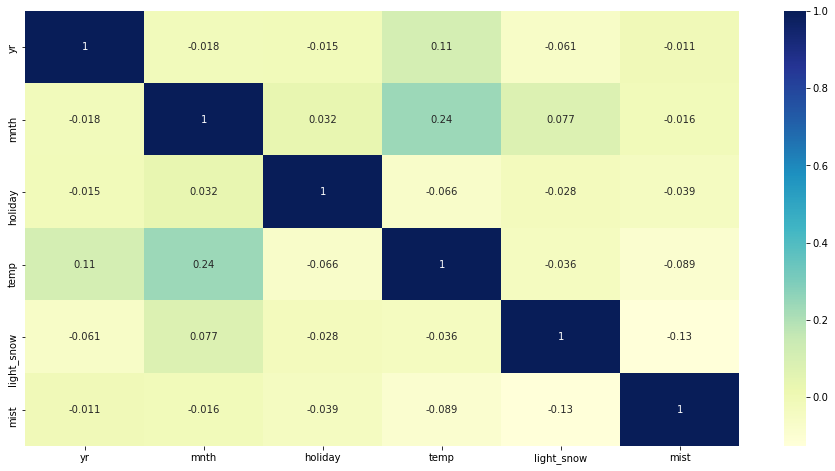

In [33]:
# Heatmap of the dependent Variables
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Applying the Model to Predict the Train data and Performing Residue Analysis

In [34]:
y_train_pred = lr_model.predict(X_train_sm)

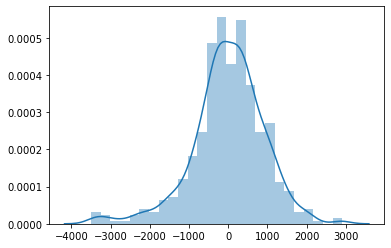

In [35]:
res = y_train - y_train_pred
sns.distplot(res)

### Applying the Model to Predict the Test Data and Performing Residue Analysis

In [37]:
#Creating target variable (cnt) and dependent variable test sets
y_test = bike_rental_data_test.pop('cnt')
X_test = bike_rental_data_test

In [38]:
#Dropping Date and Highly CoRelated columns from X_test and performing transform
X_test = X_test.drop(['atemp','casual','registered','season','dteday','weathersit'],axis=1)
X_test[scale_var] = scaler.transform(X_test[scale_var])
X_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,light_snow,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.638221,0.313293,0.027273,0.318182
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.148694,0.159584,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.743798,0.402718,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000


In [39]:
#Adding constraint and Dropping all the columns as per training data
X = X_test.drop(['hum','workingday','windspeed','weekday'],axis=1)
X_test_sm = sm.add_constant(X)
#X_test_sm = X_test_sm.drop(['hum','workingday','holiday','weekday'],axis=1)

In [40]:
# y_test Prediction
y_test_pred = lr_model.predict(X_test_sm)

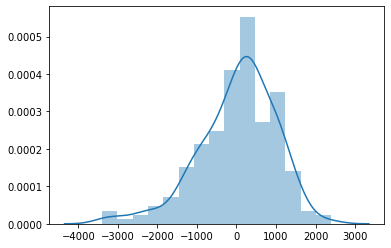

In [41]:
# Test data Residue Analysis 
res = y_test - y_test_pred
sns.distplot(res)

### r2_score value of test data

In [965]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7350530463659211

## Final Outcome of the Model
- Final Dependent Variables
    1. yr (Positive coefficient)
    2. mnth (Positive coefficient)
    3. holiday (Negative coefficient)
    4. temp (Positive coefficient)
    5. light_snow (Negative coefficient)
    6. mist (Negative coefficient)
- R-squared value of the training set: 0.775
- r2_score of the test set: 0.735
- Residue Analysis of Training and Test sets: Both are normally distributed with mean at 0

## Based on the Final Model, count can be predicted as under

<div class="alert alert-block alert-success">
<b>cnt = 762.80 + (2039.57*yr) + (1140.93*mnth) - (879.05*holiday) + (4482.681*temp) - (2426.57*light_snow) - (589.34*mist)</b>
</div>

### RFE
Recursive feature elimination

In [742]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [743]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\sarmaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [744]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 2),
 ('weekday', False, 4),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light_snow', True, 1),
 ('mist', False, 3)]

In [745]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'temp', 'hum', 'windspeed', 'light_snow'], dtype='object')

In [746]:
X_train.columns[~rfe.support_]

Index(['holiday', 'weekday', 'workingday', 'mist'], dtype='object')

In [747]:
X_train_rfe = X_train[col]

In [748]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [749]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [750]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     295.9
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.93e-161
Time:                        22:23:23   Log-Likelihood:                -4201.7
No. Observations:                 510   AIC:                             8417.
Df Residuals:                     503   BIC:                             8447.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2243.0347    257.900      8.697      0.0